In [1]:
import re, nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from wordcloud import WordCloud
from PIL import Image

In [15]:
with open("Quo_vadis.txt", encoding="utf8") as myfile:
    data = " ".join(line.rstrip() for line in myfile)

In [16]:
print(data[:200])

Henryk Sienkiewicz  Quo vadis  ISBN 978-83-288-2832-2     Rozdział pierwszy  Petroniusz obudził się zaledwie koło południa i jak zwykle, zmęczony bardzo. Poprzedniego dnia był na uczcie u Nerona, któr


In [17]:
# ?nltk

In [18]:
subbed = re.sub(r"[^\w]+", " ", data).lower()

In [19]:
print(subbed[:250])

henryk sienkiewicz quo vadis isbn 978 83 288 2832 2 rozdział pierwszy petroniusz obudził się zaledwie koło południa i jak zwykle zmęczony bardzo poprzedniego dnia był na uczcie u nerona która przeciągnęła się do późna w noc od pewnego czasu zdrowie j


In [62]:
with open("stopwords_pl.txt", encoding="utf8") as myfile:
    stop_text = " ".join(line.rstrip() for line in myfile)

stopWords = set(stop_text.split(" "))


In [63]:
text = subbed.split(" ")

In [64]:
text = [w for w in text if w not in stopWords and len(w) > 1 and w[0] != "'"]

In [65]:
print(text[:250])

['henryk', 'sienkiewicz', 'quo', 'vadis', 'isbn', '978', '83', '288', '2832', 'rozdział', 'pierwszy', 'petroniusz', 'obudził', 'zaledwie', 'koło', 'południa', 'zwykle', 'zmęczony', 'poprzedniego', 'dnia', 'uczcie', 'nerona', 'przeciągnęła', 'późna', 'noc', 'pewnego', 'czasu', 'zdrowie', 'zaczęło', 'psuć', 'mówił', 'rankami', 'budzi', 'zdrętwiały', 'możności', 'zebrania', 'myśli', 'poranna', 'kąpiel', 'staranne', 'wygniatanie', 'ciała', 'wprawionych', 'niewolników', 'przyśpieszało', 'stopniowo', 'obieg', 'leniwej', 'krwi', 'rozbudzało', 'cuciło', 'wracało', 'siły', 'elaeothesium', 'ostatniego', 'kąpielowego', 'przedziału', 'wychodził', 'jeszcze', 'wskrzeszony', 'oczami', 'błyszczącymi', 'dowcipem', 'wesołością', 'odmłodzon', 'pełen', 'życia', 'wykwintny', 'niedościgniony', 'otho', 'mógł', 'porównać', 'prawdziwy', 'nazywano', 'arbiter', 'elegantiarum', 'łaźniach', 'publicznych', 'bywał', 'rzadko', 'chyba', 'zdarzył', 'jakiś', 'budzący', 'podziw', 'retor', 'mówiono', 'mieście', 'efebiach'

In [66]:
count = {}
for word in text:
    count.setdefault(word, 0)
    count[word] = count[word] + 1

In [67]:
counts_list = [(word, c) for word, c in zip(count.keys(), count.values())]
counts_list.sort(key = lambda x: x[1], reverse=True)
print(counts_list[:200])

[('winicjusz', 612), ('rzekł', 538), ('jeszcze', 474), ('petroniusz', 424), ('począł', 307), ('chwili', 302), ('nawet', 292), ('panie', 291), ('teraz', 288), ('domu', 281), ('cezara', 263), ('czym', 262), ('cezar', 259), ('winicjusza', 256), ('ligia', 237), ('ligii', 233), ('mógł', 231), ('oczy', 229), ('mówił', 217), ('albowiem', 205), ('wówczas', 190), ('nero', 185), ('ludzi', 184), ('oto', 183), ('wreszcie', 175), ('między', 166), ('ligię', 165), ('którą', 163), ('znów', 161), ('wszystkich', 159), ('odpowiedział', 153), ('ludzie', 148), ('chilo', 147), ('raz', 146), ('zarazem', 142), ('głowę', 138), ('więcej', 137), ('ręce', 134), ('chciał', 133), ('wśród', 133), ('myśl', 128), ('niech', 127), ('twarz', 126), ('tymczasem', 126), ('ursus', 119), ('śmierć', 117), ('życie', 115), ('duszy', 115), ('akte', 115), ('człowiek', 114), ('nagle', 114), ('miasta', 113), ('wszystkie', 112), ('petroniusza', 112), ('chwilę', 109), ('odrzekł', 108), ('potem', 108), ('chrystusa', 107), ('rzymie', 10

In [68]:
counts_list[0:48]

[('winicjusz', 612),
 ('rzekł', 538),
 ('jeszcze', 474),
 ('petroniusz', 424),
 ('począł', 307),
 ('chwili', 302),
 ('nawet', 292),
 ('panie', 291),
 ('teraz', 288),
 ('domu', 281),
 ('cezara', 263),
 ('czym', 262),
 ('cezar', 259),
 ('winicjusza', 256),
 ('ligia', 237),
 ('ligii', 233),
 ('mógł', 231),
 ('oczy', 229),
 ('mówił', 217),
 ('albowiem', 205),
 ('wówczas', 190),
 ('nero', 185),
 ('ludzi', 184),
 ('oto', 183),
 ('wreszcie', 175),
 ('między', 166),
 ('ligię', 165),
 ('którą', 163),
 ('znów', 161),
 ('wszystkich', 159),
 ('odpowiedział', 153),
 ('ludzie', 148),
 ('chilo', 147),
 ('raz', 146),
 ('zarazem', 142),
 ('głowę', 138),
 ('więcej', 137),
 ('ręce', 134),
 ('chciał', 133),
 ('wśród', 133),
 ('myśl', 128),
 ('niech', 127),
 ('twarz', 126),
 ('tymczasem', 126),
 ('ursus', 119),
 ('śmierć', 117),
 ('życie', 115),
 ('duszy', 115)]

In [69]:
wc_dict = {w: c for w,c in counts_list[10:72]}

In [70]:
mask = np.array(Image.open("storm.png"))

In [71]:
cloud = WordCloud(background_color="white", mask=mask, max_words=100)

In [72]:
cloud.generate_from_frequencies(wc_dict)

(-0.5, 839.5, 754.5, -0.5)

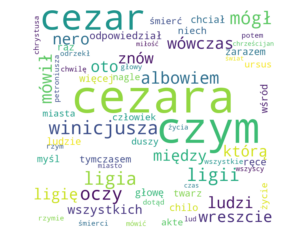

In [73]:
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")

In [45]:
cloud.to_file("long_q_cloud.png")